Name: Kemal Demirel

ID: 191104091

Course: BIL470

Homework_2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from LR import Linear_Regression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Exploratory Data Analysis (EDA)

In [2]:
dataset = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
dataset = dataset.drop(columns="Gender")


In [3]:
display(dataset);

Height  Weight  Index
0       174      96      4
1       189      87      2
2       185     110      4
3       195     104      3
4       149      61      3
..      ...     ...    ...
495     150     153      5
496     184     121      4
497     141     136      5
498     150      95      5
499     173     131      5

[500 rows x 3 columns]

In [4]:
print("Number of Columns: 3")
print( dataset["Height"].describe() )
print( dataset["Weight"].describe() )
print( dataset["Index"].describe() )

Number of Columns: 3
count    500.000000
mean     169.944000
std       16.375261
min      140.000000
25%      156.000000
50%      170.500000
75%      184.000000
max      199.000000
Name: Height, dtype: float64
count    500.000000
mean     106.000000
std       32.382607
min       50.000000
25%       80.000000
50%      106.000000
75%      136.000000
max      160.000000
Name: Weight, dtype: float64
count    500.000000
mean       3.748000
std        1.355053
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Index, dtype: float64


In [5]:
display( dataset[dataset.duplicated()] )
display( dataset.duplicated().sum() )
dataset.isnull().sum().sort_values(ascending=False)/dataset.shape[0]

Height  Weight  Index
20      157     110      5
162     192     101      3
187     182      84      3
197     177     117      4
260     159     104      5
310     171     147      5
321     181     111      4
327     167      85      4
334     157      56      2
347     162      58      2
354     190      50      0
355     174      90      3
365     141      80      5
381     191      62      1
382     177     117      4
395     164      71      3
398     149      61      3
400     195     104      3
419     177      61      2
421     140     146      5
462     179      56      1
466     188      99      3
482     142      86      5
492     198      50      0

24

Height    0.0
Weight    0.0
Index     0.0
dtype: float64

/Users/kemaldemirel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='count'>

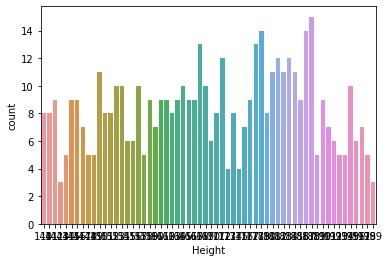

In [6]:
sns.countplot(dataset["Height"])

/Users/kemaldemirel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='count'>

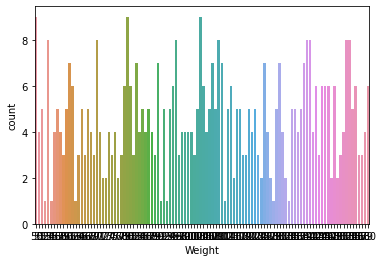

In [7]:
sns.countplot(dataset["Weight"])

/Users/kemaldemirel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Index', ylabel='count'>

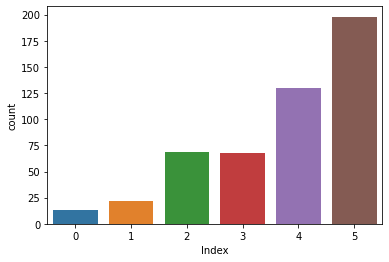

In [8]:
sns.countplot(dataset["Index"])

# Pair-plot

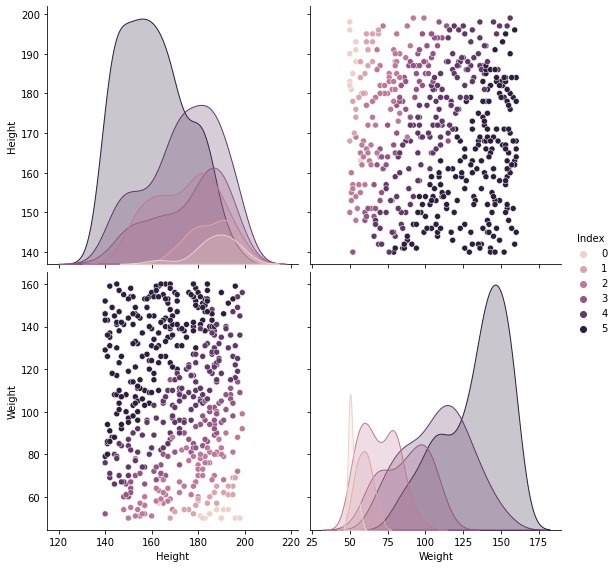

In [9]:
sns.pairplot(dataset, hue="Index", height=4)
plt.show()

# Correlation Matrix

     Height  Weight  Index
0       174      96      4
1       189      87      2
2       185     110      4
3       195     104      3
4       149      61      3
..      ...     ...    ...
495     150     153      5
496     184     121      4
497     141     136      5
498     150      95      5
499     173     131      5

[500 rows x 3 columns]


<AxesSubplot:>

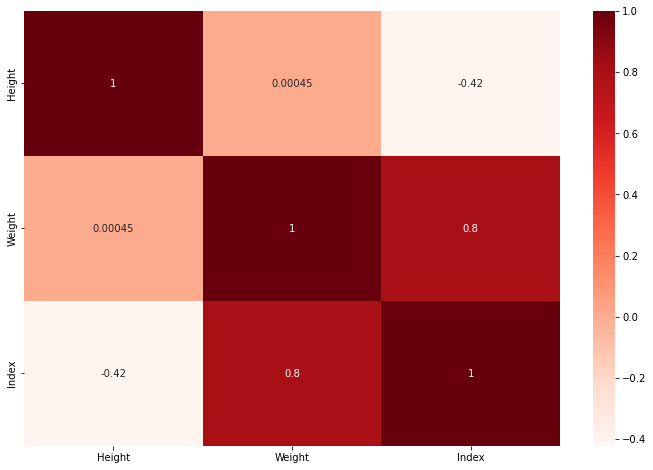

In [10]:
corr = dataset.corr()
print(dataset)

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Reds",annot=True)

# Training

Create Liner Regression Model

In [11]:
lreg = Linear_Regression(learning_rate=0.000005, epoch=1000)

Split dataset to train and test

In [12]:
X=dataset.values.tolist();
y=[];
for row in X:
    y.append(int(row[2]));
    del row[2];
X=pd.Series(X);
y=pd.Series(y);
X_train, X_test, z_train, z_test = train_test_split(X, y, test_size=0.5, shuffle=True);

X_train=X_train.values;
z_train=z_train.values;
x_test=X_test.values;
z_test=z_test.values;

print(X_train.shape)
print(z_train.shape)
print(x_test.shape)
print(z_test.shape)

x_train=[];
y_train=[];
for row in X_train:
    y_train.append(int(row[1]));
    x_train.append(int(row[0]));

(250,)
(250,)
(250,)
(250,)


### Train The Linear Regression Model

In [13]:
temp_x_test = []
temp_y_test = []
for val in x_test:
    temp_x_test.append(val[0])
    temp_y_test.append(val[1])

results = lreg.fit(x_train, y_train, z_train)

sum_test = 0
sum_train = 0

test_mse = []
train_mse = []
accuracy_train = []
accuracy_test = []

from sklearn.metrics import r2_score

for i in range(len(results)):
    z_pred_train_acc = []
    z_pred_test_acc = []
    
    
    for j in range(len(x_train)):
        z_pred_mse_train = (results[i][0]*x_train[j] + results[i][1]*y_train[j] + results[i][2])
        z_pred_mse_test = (results[i][0]*temp_x_test[j] + results[i][1]*temp_y_test[j] + results[i][2])
        
        z_pred_train_acc.append(z_pred_mse_train)
        z_pred_test_acc.append(z_pred_mse_test)
        
        sum_test += (z_pred_mse_test - z_test[j]) ** 2
        sum_train += (z_pred_mse_train - z_train[j]) ** 2
    
    sum_test = sum_test / len(x_train)
    sum_train = sum_train / len(x_train)
    
    test_mse.append(sum_test)
    train_mse.append(sum_train)
    
    
    accuracy_train_result = r2_score(z_train, z_pred_train_acc) * 100
    accuracy_test_result = r2_score(z_test, z_pred_test_acc) * 100
    
    accuracy_train.append(accuracy_train_result)
    accuracy_test.append(accuracy_test_result)
    

z_pred = lreg.predict(temp_x_test, temp_y_test)
z_pred_train = lreg.predict(x_train, y_train)

# Predict Class of Test Values

Rsquare

In [14]:
from sklearn.metrics import r2_score
print("Model Rsquare Train Accuracy:",r2_score(z_pred_train, z_train) )
print("Model Rsquare Test Accuracy:",r2_score(z_pred, z_test) )

Model Rsquare Train Accuracy: 0.7607650675258437
Model Rsquare Test Accuracy: 0.7918101056697106


Ba≈ülangƒ±√ßta elde ettiƒüim Model Rsquare Train Accuracy ve Model Rsquare Test Accuracy deƒüerleri daha azdƒ±.ùëç = ùëö1 ‚àó ùë• + ùëö2 ‚àó ùë¶ + ùëè denklemindeki ba≈ülangƒ±√ßta varsayƒ±lan verdiƒüimiz m1=1,m2=2 ve b=0  deƒüerlerinde deƒüi≈üiklikler yapƒ±p en y√ºksek ba≈üarƒ±m veren deƒüerleri se√ßtim ve eƒüitimi bu ≈üekilde ba≈ülatarak ger√ßekle≈ütirdim ve en uygun sonucu elde ettim

# Plot the Results

### Loss with Test Data

Normal Scale ve Logaritmic Scale olarak iki grafik √ßizdim.

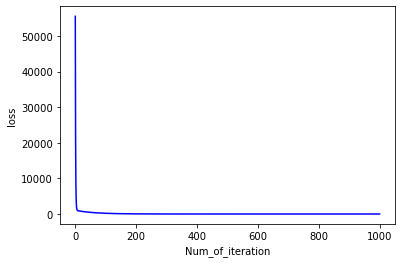

In [15]:
# Normal Scale
rng = np.arange(0,1000)
plt.xlabel('Num_of_iteration')
plt.ylabel('loss')
plt.plot(rng, test_mse, color='b')
plt.show()

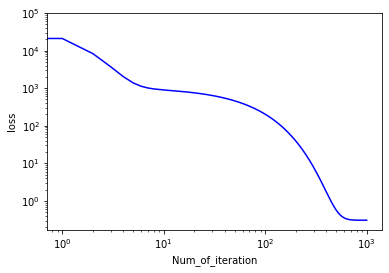

In [16]:
# Logarithmic Scale
rng = np.arange(0,1000)
plt.xlabel('Num_of_iteration')
plt.ylabel('loss')
plt.plot(rng, test_mse, color='b')
plt.yscale('log')
plt.xscale('log')
plt.show()

Test verisi √ºzerinde eƒüitim verileri test edilirken her epoch'da hata miktarƒ± azalmaktadƒ±r.Loss her iterasyonda azalmƒ±≈ü fakat bazƒ± iterasyonlardan sonra hata miktarƒ±nda ciddi ≈üekilde bir azalma g√∂zlemlenmektedir. Belirli bir iterasyondan sonra hata payƒ±nda azalma miktarƒ± neredeyse sƒ±fƒ±ra inmi≈ütir ve bu da yakla≈üƒ±k 800-900 iterasyon aralƒ±ƒüƒ±nda ger√ßekle≈ümi≈ütir.Epoch 1000 se√ßilmesi gayet ideal olmu≈ü ve yakla≈üƒ±k 800.iterasyondan sonra hata miktarƒ±nda azalma nerdeyse hi√ß olmamƒ±≈ütƒ±r ve eƒüitim 1000. epoch'da sonlandƒ±rƒ±lmƒ±≈ütƒ±r.Daha fazla iterasyon yapmak loss'da nerdeyse hi√ß azalmaya sebeb olmaz ve bo≈üuna makinayƒ± eƒüitmekle me≈ügul oluruz ve verimlilik azalƒ±r.  

### Loss with Train Data

Normal Scale ve Logaritmic Scale olarak iki grafik √ßizdim.

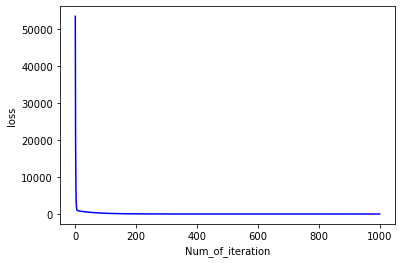

In [17]:
# Normal Scale
rng = np.arange(0,1000)
plt.xlabel('Num_of_iteration')
plt.ylabel('loss')
plt.plot(rng, train_mse, color='b')
plt.show()

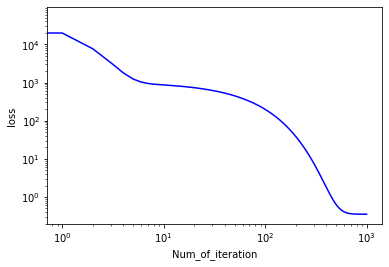

In [18]:
# Logarithmic Scale
rng = np.arange(0,1000)
plt.xlabel('Num_of_iteration')
plt.ylabel('loss')
plt.plot(rng, train_mse, color='b')
plt.yscale('log')
plt.xscale('log')
plt.show()

Train verisi √ºzerinde eƒüitim verileri test edilirken her epoch'da hata miktarƒ± azalmaktadƒ±r.Loss her iterasyonda azalmƒ±≈ü fakat bazƒ± iterasyonlardan sonra hata miktarƒ±nda ciddi ≈üekilde bir azalma g√∂zlemlenmektedir. Belirli bir iterasyondan sonra hata payƒ±nda azalma miktarƒ± neredeyse sƒ±fƒ±ra inmi≈ütir ve bu da yakla≈üƒ±k 800-900 iterasyon aralƒ±ƒüƒ±nda ger√ßekle≈ümi≈ütir.Epoch 1000 se√ßilmesi gayet ideal olmu≈ü ve yakla≈üƒ±k 800.iterasyondan sonra hata miktarƒ±nda azalma nerdeyse hi√ß olmamƒ±≈ütƒ±r ve eƒüitim 1000. epoch'da sonlandƒ±rƒ±lmƒ±≈ütƒ±r.Daha fazla iterasyon yapmak loss'da nerdeyse hi√ß azalmaya sebeb olmaz ve bo≈üuna makinayƒ± eƒüitmekle me≈ügul oluruz ve verimlilik azalƒ±r.  

### Loss with Test Data vs Train Data

Loss hesabƒ± yapƒ±lƒ±rken test_data ve train_data kullanƒ±lmasƒ±nda nerdeyse hi√ß ba≈üarƒ±m farkƒ± yoktur bu demek olur ki eƒüitim ba≈üarƒ± bir ≈üekilde ger√ßekle≈ümi≈ü ve data ba≈üarƒ± bir ≈üekilde rastgele %50 %50 olacak ≈üekilde train ve test olacak ≈üekilde ayrƒ±lmƒ±≈ütƒ±r.

### Accuracy with Test Data

Accuracy i√ßin Rsquare tercih edilmi≈ütir.

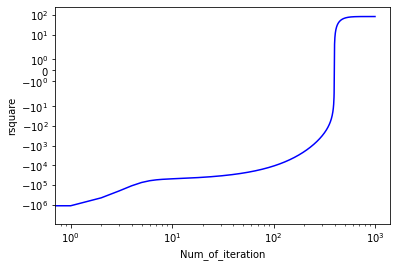

In [19]:
rng = np.arange(0,1000)
plt.xlabel('Num_of_iteration')
plt.ylabel('rsquare')
plt.plot(rng, accuracy_test, color='b')
plt.yscale('symlog')
plt.xscale('log')
plt.show()

Test verisi √ºzerinde eƒüitim verileri test edilirken her epoch'da ba≈üarƒ±m artƒ±rƒ±lmaktadƒ±r.Rsquare her iterasyonda artmƒ±≈ü fakat bazƒ± noktalarda ba≈üarƒ±m √ßok ciddi ≈üekilde artmƒ±≈ü ve bir yerden sonra ba≈üarƒ±m artƒ±≈üƒ± durma noktasƒ±na gelmi≈ütir.Epoch 1000 se√ßilmesi gayet ideal olmu≈ü ve yakla≈üƒ±k 800.iterasyondan sonra Rsquare skorunda nerdeyse artƒ±≈ü olmamƒ±≈ütƒ±r ve eƒüitim 1000. epoch'da sonlandƒ±rƒ±lmƒ±≈ütƒ±r.Daha fazla iterasyon yapmak Rsquare scorunda nerdeyse hi√ß artƒ±≈üa sebeb olmaz ve bo≈üuna makinayƒ± eƒüitmekle me≈ügul oluruz ve verimlilik azalƒ±r.  

### Accuracy with Train Data

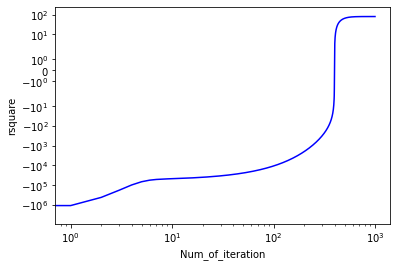

In [20]:
rng = np.arange(0,1000)
plt.xlabel('Num_of_iteration')
plt.ylabel('rsquare')
plt.plot(rng, accuracy_train, color='b')
plt.yscale('symlog')
plt.xscale('log')
plt.show()

Train verisi √ºzerinde eƒüitim verileri test edilirken her epoch'da ba≈üarƒ±m artƒ±rƒ±lmaktadƒ±r.Rsquare her iterasyonda artmƒ±≈ü fakat bazƒ± noktalarda ba≈üarƒ±m √ßok ciddi ≈üekilde artmƒ±≈ü ve bir yerden sonra ba≈üarƒ±m artƒ±≈üƒ± durma noktasƒ±na gelmi≈ütir.Epoch 1000 se√ßilmesi gayet ideal olmu≈ü ve yakla≈üƒ±k 800.iterasyondan sonra Rsquare skorunda nerdeyse artƒ±≈ü olmamƒ±≈ütƒ±r ve eƒüitim 1000. epoch'da sonlandƒ±rƒ±lmƒ±≈ütƒ±r.Daha fazla iterasyon yapmak Rsquare scorunda nerdeyse hi√ß artƒ±≈üa sebeb olmaz ve bo≈üuna makinayƒ± eƒüitmekle me≈ügul oluruz ve verimlilik azalƒ±r.  

### Accuracy with Train Data vs Test Data

Accuracy hesabƒ± yapƒ±lƒ±rken test_data ve train_data kullanƒ±lmasƒ±nda nerdeyse hi√ß ba≈üarƒ±m farkƒ± yoktur bu demek olur ki eƒüitim ba≈üarƒ± bir ≈üekilde ger√ßekle≈ümi≈ü ve data ba≈üarƒ± bir ≈üekilde rastgele %50 %50 olacak ≈üekilde train ve test olacak ≈üekilde ayrƒ±lmƒ±≈ütƒ±r.

### ùëç = ùëö1 ‚àó ùë• + ùëö2 ‚àó ùë¶ + ùëè     √ºzerinde deƒüi≈üiklikler yapƒ±lmasƒ± ve bunlarƒ±n yorumlanmasƒ±

Ba≈ülangƒ±√ßta varsayƒ±lan olarak m1=1, m2=2 ve b=0 aldƒ±m. m1 ve m2 deƒüerlerini deƒüi≈ütirdiƒüim zaman ba≈üarƒ±mda √ßok fazla bir farklƒ±lƒ±k g√∂zlemlemedim fakat b deƒüerini deƒüi≈ütirdiƒüim zaman ba≈üarƒ±mda ciddi deƒüi≈üimler g√∂zlemledim. Uzun g√∂zlemler sonucunda b=5 olarak aldƒ±ƒüƒ±mda ba≈üarƒ±mƒ±n alabildiƒüim en y√ºksek deƒüer olduƒüunu g√∂rd√ºm ve varsayƒ±lan olarak m1=1, m2=2 ve b=5 aldƒ±m.